# Analysis of Toronto Auto Theft Trends (2014–2024)

## Overview
This project performs an **Exploratory Data Analysis (EDA)** on auto theft incidents across various Toronto neighborhoods over an 11-year period. The goal is to identify temporal trends, high-risk geographic areas, and provide a simple forecast for future years to help understand the changing landscape of property crime in the city.

## Dataset
The analysis uses the `neighbourhood-crime-rates - 4326.csv` dataset, which contains historical crime counts and rates (per 100,000 population) for different crime categories across Toronto's neighborhoods.

## Research Questions
* How has the total number of auto thefts in Toronto changed between 2014 and 2024?
* Which neighborhoods consistently report the highest volume of auto thefts?
* Which areas have seen the most significant percentage increase in thefts over the last decade?
* What is the projected trend for auto thefts in the coming years (2025–2027)?

## Key Objectives
1.  Clean and isolate auto theft-specific data.
2.  Visualize the city-wide trend from 2014 to 2024.
3.  Identify the top 10 neighborhoods by total theft volume and current theft rates.
4.  Calculate and rank neighborhoods by the highest percentage growth in incidents.
5.  Build a linear regression model to forecast future theft numbers.

## Data Loading
In this section, we import the necessary libraries—primarily `pandas` for data manipulation—and load the raw neighborhood crime dataset. We perform an initial check of the data dimensions to understand the scale of the information we are working with.

In [ ]:
import pandas as pd

df = pd.read_csv("neighbourhood-crime-rates - 4326.csv")
df.head()
# Show shape and first few rows
print(f"Shape of the dataset: {df.shape}")
df.head()

Shape of the dataset: (158, 203)


,_id,AREA_NAME,HOOD_ID,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,ASSAULT_2020,...,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,THEFTOVER_RATE_2023,THEFTOVER_RATE_2024,POPULATION_2024,geometry
0,1,South Eglinton-Davisville,174,55,56,66,73,74,62,74,...,4.915454,14.018037,13.369579,17.041582,24.314138,11.784578,29.877502,21.895412,27403,"{""coordinates"": [[[[-79.3863542900264, 43.6978..."
1,2,North Toronto,173,53,57,47,61,66,84,80,...,15.913431,36.767410,27.324270,44.651402,11.916821,22.527596,36.672256,30.109901,19927,"{""coordinates"": [[[[-79.3974398976879, 43.7069..."
2,3,Dovercourt Village,172,62,65,92,105,106,113,91,...,22.389730,30.136368,30.436768,23.027327,15.363343,30.355923,22.052338,51.139683,13688,"{""coordinates"": [[[[-79.4341164165158, 43.6601..."
3,4,Junction-Wallace Emerson,171,164,159,171,161,163,186,171,...,24.498795,36.736195,16.320536,36.677807,32.307568,31.404570,33.652409,47.570259,27328,"{""coordinates"": [[[[-79.4387032547807, 43.6676..."
4,5,Yonge-Bay Corridor,170,387,521,481,602,576,660,377,...,290.095306,353.045013,489.814972,263.812469,188.747726,348.980438,329.405792,289.715118,16568,"{""coordinates"": [[[[-79.3840431592607, 43.6449..."


## Data Exploration
The dataset is comprehensive, containing over 200 columns that cover various crime types (assault, robbery, theft, etc.) and demographic data across 158 neighborhoods. Checking the data structure and column names is critical here to identify exactly which fields contain the historical auto theft counts and rates we need for our specific analysis.

In [3]:
# Check column names and data types
df.info()

# Look at column names more clearly
df.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Columns: 203 entries, _id to geometry
dtypes: float64(149), int64(52), object(2)
memory usage: 250.7+ KB


['_id',
 'AREA_NAME',
 'HOOD_ID',
 'ASSAULT_2014',
 'ASSAULT_2015',
 'ASSAULT_2016',
 'ASSAULT_2017',
 'ASSAULT_2018',
 'ASSAULT_2019',
 'ASSAULT_2020',
 'ASSAULT_2021',
 'ASSAULT_2022',
 'ASSAULT_2023',
 'ASSAULT_2024',
 'ASSAULT_RATE_2014',
 'ASSAULT_RATE_2015',
 'ASSAULT_RATE_2016',
 'ASSAULT_RATE_2017',
 'ASSAULT_RATE_2018',
 'ASSAULT_RATE_2019',
 'ASSAULT_RATE_2020',
 'ASSAULT_RATE_2021',
 'ASSAULT_RATE_2022',
 'ASSAULT_RATE_2023',
 'ASSAULT_RATE_2024',
 'AUTOTHEFT_2014',
 'AUTOTHEFT_2015',
 'AUTOTHEFT_2016',
 'AUTOTHEFT_2017',
 'AUTOTHEFT_2018',
 'AUTOTHEFT_2019',
 'AUTOTHEFT_2020',
 'AUTOTHEFT_2021',
 'AUTOTHEFT_2022',
 'AUTOTHEFT_2023',
 'AUTOTHEFT_2024',
 'AUTOTHEFT_RATE_2014',
 'AUTOTHEFT_RATE_2015',
 'AUTOTHEFT_RATE_2016',
 'AUTOTHEFT_RATE_2017',
 'AUTOTHEFT_RATE_2018',
 'AUTOTHEFT_RATE_2019',
 'AUTOTHEFT_RATE_2020',
 'AUTOTHEFT_RATE_2021',
 'AUTOTHEFT_RATE_2022',
 'AUTOTHEFT_RATE_2023',
 'AUTOTHEFT_RATE_2024',
 'BIKETHEFT_2014',
 'BIKETHEFT_2015',
 'BIKETHEFT_2016',
 'BIKET

## Data Processing
To maintain a focused analysis, we isolate only the columns related to `AREA_NAME` and `AUTOTHEFT`. We create a subset of the original dataframe, `df_auto`, which specifically holds raw incident counts and normalized rates for each year from 2014 through 2024. This streamlining ensures computational efficiency and clearer visualization in subsequent steps.

In [4]:
autotheft_cols = ['AREA_NAME'] + [col for col in df.columns if 'AUTOTHEFT_' in col]

df_auto = df[autotheft_cols].copy()

df_auto.head()


,AREA_NAME,AUTOTHEFT_2014,AUTOTHEFT_2015,AUTOTHEFT_2016,AUTOTHEFT_2017,AUTOTHEFT_2018,AUTOTHEFT_2019,AUTOTHEFT_2020,AUTOTHEFT_2021,AUTOTHEFT_2022,...,AUTOTHEFT_RATE_2015,AUTOTHEFT_RATE_2016,AUTOTHEFT_RATE_2017,AUTOTHEFT_RATE_2018,AUTOTHEFT_RATE_2019,AUTOTHEFT_RATE_2020,AUTOTHEFT_RATE_2021,AUTOTHEFT_RATE_2022,AUTOTHEFT_RATE_2023,AUTOTHEFT_RATE_2024
0,South Eglinton-Davisville,2,4.0,3,8.0,15,8,14,15,10,...,21.779375,15.591705,39.323635,70.090179,35.652214,59.645535,60.785347,39.281925,74.693756,58.387768
1,North Toronto,7,1.0,2,2.0,4,4,12,14,10,...,8.637071,17.290567,15.913431,29.413927,27.324270,76.545258,83.417747,56.318993,94.300087,45.164852
2,Dovercourt Village,10,13.0,18,15.0,12,13,24,10,25,...,96.282036,133.126251,111.948654,90.409103,98.919495,184.218613,76.816719,189.724518,198.471039,263.004089
3,Junction-Wallace Emerson,21,17.0,12,18.0,32,25,44,34,47,...,71.317696,49.005596,73.496384,130.617569,102.003349,179.313721,137.307159,184.501846,130.870468,164.666275
4,Yonge-Bay Corridor,12,20.0,20,14.0,27,38,14,16,29,...,182.798645,171.629623,116.038124,216.641251,295.443939,105.524986,116.152451,198.439850,291.397430,223.322067


## City-Wide Trend Analysis
We begin by aggregating the total number of auto thefts across all Toronto neighborhoods for each year.

### Interpreting the Visual
The resulting line plot illustrates the temporal trajectory of auto thefts. This overview allows us to see if thefts are declining, stable, or—as often reported in recent years—on a significant upward climb. Identifying the "inflection points" in this graph helps contextualize when city-wide changes in crime patterns began to occur.

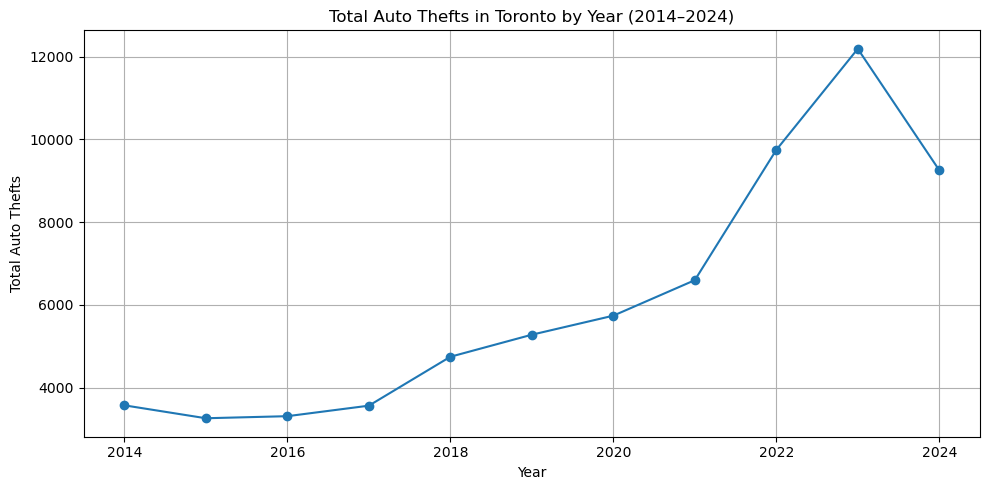

In [5]:
import matplotlib.pyplot as plt

# Extract total auto thefts across the city per year
year_cols = [col for col in df_auto.columns if col.startswith('AUTOTHEFT_') and not col.startswith('AUTOTHEFT_RATE')]
auto_thefts_total = df_auto[year_cols].sum().reset_index()
auto_thefts_total.columns = ['Year', 'Total_Thefts']
auto_thefts_total['Year'] = auto_thefts_total['Year'].str.extract(r'(\d{4})').astype(int)

# Plot trend
plt.figure(figsize=(10, 5))
plt.plot(auto_thefts_total['Year'], auto_thefts_total['Total_Thefts'], marker='o')
plt.title('Total Auto Thefts in Toronto by Year (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Total Auto Thefts')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Calculate total auto thefts per neighborhood across all years
df_auto['TOTAL_AUTOTHEFTS'] = df_auto[[col for col in df_auto.columns if col.startswith('AUTOTHEFT_') and not 'RATE' in col]].sum(axis=1)

# Top 10 neighborhoods by total auto thefts
top_theft_hoods = df_auto[['AREA_NAME', 'TOTAL_AUTOTHEFTS']].sort_values(by='TOTAL_AUTOTHEFTS', ascending=False).head(10)

top_theft_hoods

,AREA_NAME,TOTAL_AUTOTHEFTS
153,West Humber-Clairville,5372.0
125,York University Heights,1735.0
46,Etobicoke City Centre,1518.0
157,Humber Summit,1174.0
69,Wexford/Maryvale,1113.0
29,Milliken,1091.0
121,Yorkdale-Glen Park,1032.0
8,Oakdale-Beverley Heights,1005.0
126,Glenfield-Jane Heights,963.0
113,Bedford Park-Nortown,956.0


## Neighborhood Analysis
Aggregate city-wide data can mask local variations. In this section, we identify high-crime areas using three distinct metrics:
1.  **Total Volume:** Which neighborhoods had the highest cumulative thefts over the 11-year period?
2.  **Growth Rate:** Which neighborhoods saw the most dramatic percentage increase between 2014 and 2024?
3.  **Current Rate:** Which neighborhoods had the highest thefts per capita in 2024?

### Key Insights
* **West Humber-Clairville** stands out significantly, with over 5,300 total thefts—more than double the next highest neighborhood.
* Several neighborhoods, such as **East L'Amoreaux**, have seen staggering increases exceeding 900% in raw theft counts over the last decade.
* High-theft areas often correspond to neighborhoods with large parking facilities, commercial hubs, or easy access to major highways, which may facilitate rapid vehicle removal.

In [7]:
# Calculate percent change in raw auto thefts (2024 vs 2014)
df_auto['AUTOTHEFT_2014'] = df_auto['AUTOTHEFT_2014'].replace(0, 1)  # Avoid divide by zero
df_auto['PCT_CHANGE_2014_2024'] = ((df_auto['AUTOTHEFT_2024'] - df_auto['AUTOTHEFT_2014']) / df_auto['AUTOTHEFT_2014']) * 100

# Top 10 neighborhoods with highest % increase
fastest_rising = df_auto[['AREA_NAME', 'AUTOTHEFT_2014', 'AUTOTHEFT_2024', 'PCT_CHANGE_2014_2024']].sort_values(by='PCT_CHANGE_2014_2024', ascending=False).head(10)

fastest_rising

,AREA_NAME,AUTOTHEFT_2014,AUTOTHEFT_2024,PCT_CHANGE_2014_2024
14,East L'Amoreaux,7,75,971.428571
60,Yonge-St.Clair,2,20,900.000000
17,Malvern West,7,64,814.285714
22,Guildwood,2,17,750.000000
0,South Eglinton-Davisville,2,16,700.000000
30,Agincourt North,17,128,652.941176
127,Broadview North,2,15,650.000000
149,Elms-Old Rexdale,7,52,642.857143
59,Rosedale-Moore Park,10,74,640.000000
92,The Beaches,8,59,637.500000


## Trend Forecasting (2025–2027)
Using a simple **Linear Regression** model, we project the historical trend into the near future. While this basic model assumes the current growth rate will continue linearly, it serves as a valuable baseline for understanding the potential scale of the auto theft challenge if no significant interventions occur.

In [8]:
# Pull per capita auto theft rate in 2024 (already provided in dataset)
rate_2024 = df_auto[['AREA_NAME', 'AUTOTHEFT_RATE_2024']].sort_values(by='AUTOTHEFT_RATE_2024', ascending=False).head(10)

rate_2024


,AREA_NAME,AUTOTHEFT_RATE_2024
153,West Humber-Clairville,1696.530151
46,Etobicoke City Centre,870.609436
157,Humber Summit,810.464966
125,York University Heights,697.047607
29,Milliken,668.598145
69,Wexford/Maryvale,594.343933
156,Humbermede,576.001648
6,Bendale-Glen Andrew,574.176086
121,Yorkdale-Glen Park,547.570129
119,Clanton Park,529.403320


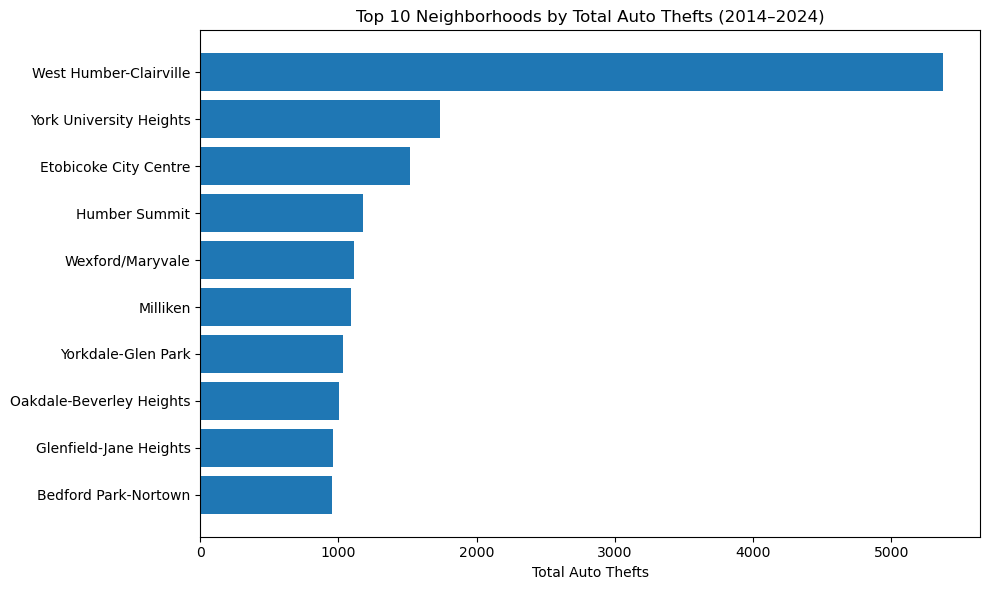

In [9]:
# Bar plot for top neighborhoods by total auto thefts
plt.figure(figsize=(10, 6))
plt.barh(top_theft_hoods['AREA_NAME'], top_theft_hoods['TOTAL_AUTOTHEFTS'])
plt.gca().invert_yaxis()
plt.title('Top 10 Neighborhoods by Total Auto Thefts (2014–2024)')
plt.xlabel('Total Auto Thefts')
plt.tight_layout()
plt.show()


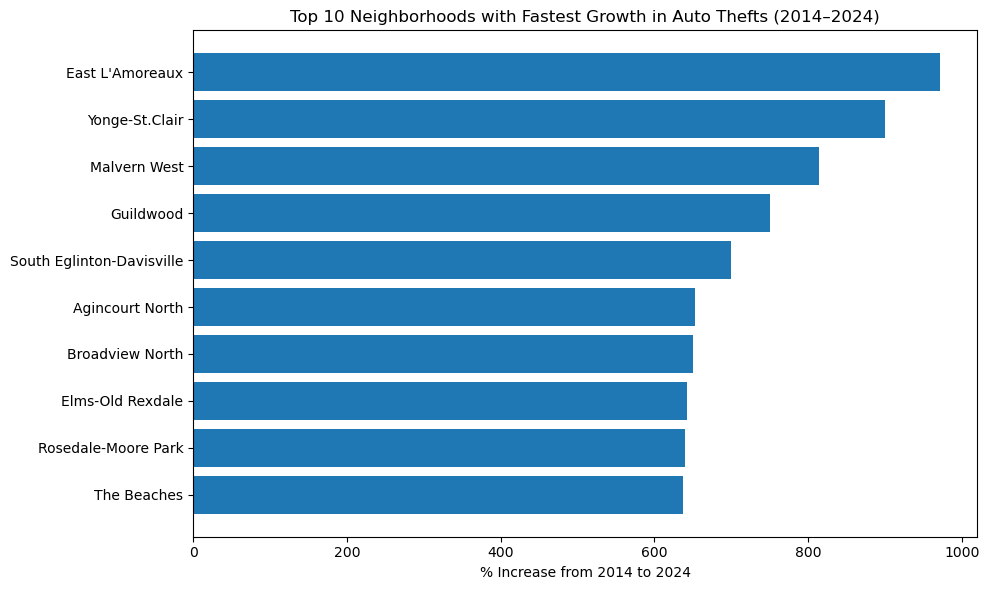

In [10]:
# Bar plot for fastest rising neighborhoods
plt.figure(figsize=(10, 6))
plt.barh(fastest_rising['AREA_NAME'], fastest_rising['PCT_CHANGE_2014_2024'])
plt.gca().invert_yaxis()
plt.title('Top 10 Neighborhoods with Fastest Growth in Auto Thefts (2014–2024)')
plt.xlabel('% Increase from 2014 to 2024')
plt.tight_layout()
plt.show()


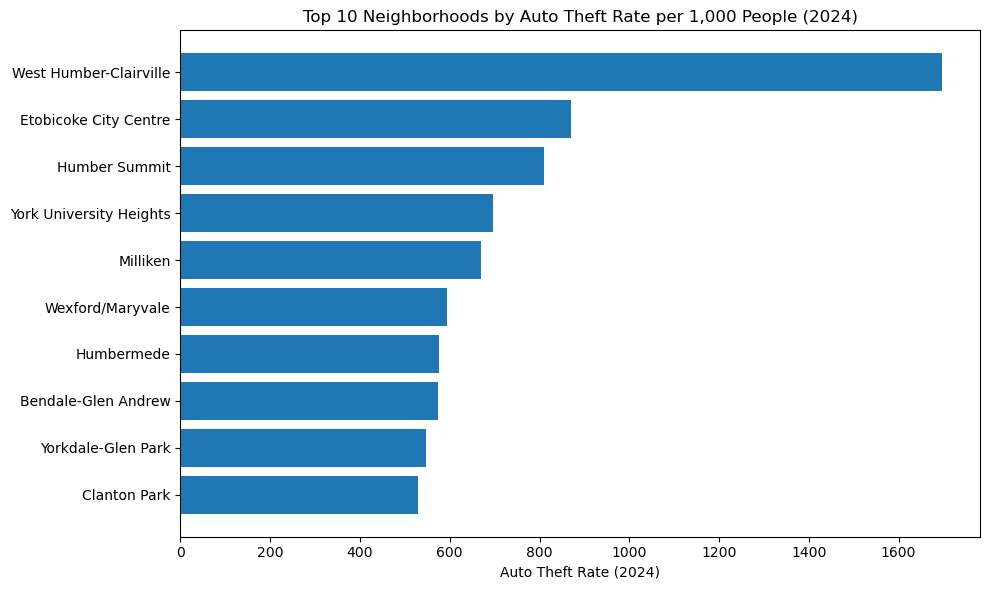

In [11]:
# Bar plot for per capita rates
plt.figure(figsize=(10, 6))
plt.barh(rate_2024['AREA_NAME'], rate_2024['AUTOTHEFT_RATE_2024'])
plt.gca().invert_yaxis()
plt.title('Top 10 Neighborhoods by Auto Theft Rate per 1,000 People (2024)')
plt.xlabel('Auto Theft Rate (2024)')
plt.tight_layout()
plt.show()


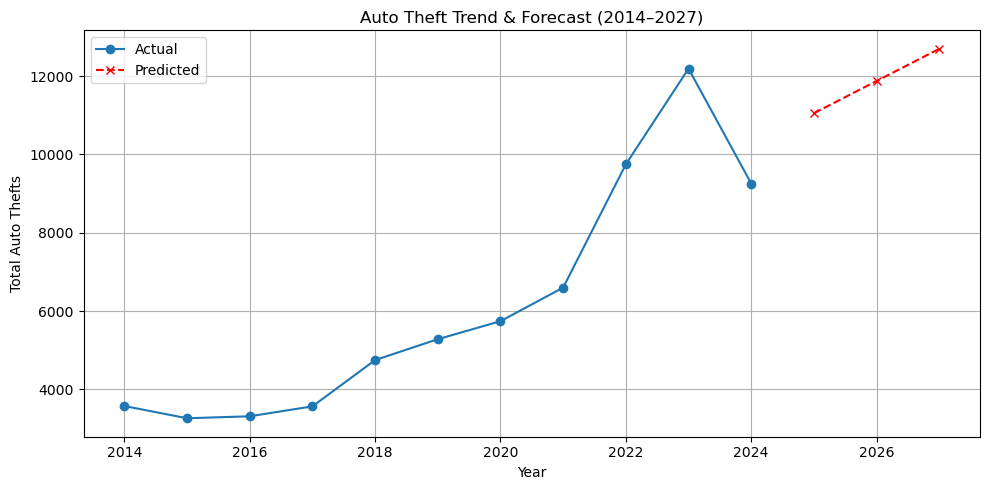

,Year,Predicted_Thefts
0,2025,11051
1,2026,11874
2,2027,12697


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = auto_thefts_total[['Year']]
y = auto_thefts_total['Total_Thefts']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for 2025–2027
future_years = pd.DataFrame({'Year': [2025, 2026, 2027]})
future_preds = model.predict(future_years)

# Combine with actuals for plotting
pred_df = pd.concat([auto_thefts_total, future_years.assign(Total_Thefts=future_preds)], ignore_index=True)

# Plot actual + predicted
plt.figure(figsize=(10, 5))
plt.plot(auto_thefts_total['Year'], auto_thefts_total['Total_Thefts'], marker='o', label='Actual')
plt.plot(future_years['Year'], future_preds, marker='x', linestyle='--', color='red', label='Predicted')
plt.title('Auto Theft Trend & Forecast (2014–2027)')
plt.xlabel('Year')
plt.ylabel('Total Auto Thefts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print predictions
future_years['Predicted_Thefts'] = future_preds.round().astype(int)
future_years


## Conclusions and Next Steps

### Summary of Findings
* **Surging Trends:** Auto thefts in Toronto have shown a clear upward trajectory over the last decade.
* **Geographic Concentration:** A small number of neighborhoods account for a disproportionately large percentage of the city's total auto thefts, with **West Humber-Clairville** being the primary hotspot.
* **Rapid Escalation:** The problem is not just about high-volume areas; several residential neighborhoods are seeing triple-digit percentage increases in theft incidents compared to ten years ago.

### Implications
These findings suggest that auto theft is an increasingly pervasive issue in Toronto. The concentration in specific areas suggests that targeted law enforcement and community awareness programs in these "hotspots" could be more effective than broad city-wide measures.

### Next Steps
* **Correlation Analysis:** Compare theft rates with socio-economic data or proximity to shipping ports and transit hubs.
* **Seasonal Patterns:** Analyze the data by month or day of the week (if granular data is available) to identify seasonal trends.
* **Advanced Modeling:** Employ non-linear time-series models (like Prophet or ARIMA) to capture more complex growth patterns and seasonality.